## Simple linear regression assumptions

There are four assumptions of simple linear regression:

1. **Linearity**: Each predictor variable (Xi) is linearly related to the outcome variable (Y).

2. **Normality**: The errors are normally distributed.*

3. **Independent** Observations: Each observation in the dataset is independent.

4. **Homoscedasticity**: The variance of the errors is constant or similar across the model.*

***Note on errors and residuals**

This course has rather interchangeably used the terms "errors" and "residuals" in connection with regression. You may see this in other online resources and materials throughout your time as a data professional. In actuality, there is a difference:

- **Residuals** are the difference between the predicted and observed values. You can calculate residuals after you build a regression model by subtracting the predicted values from the observed values.

- **Errors** are the natural noise assumed to be in the model.

- Residuals are used to estimate errors when checking the normality and homoscedasticity assumptions of linear regression.

**Load the dataset**

The first few lines of code set up the coding environment and loaded the data. As you might be familiar with, you can call on the `import` function to import any necessary packages. You should use conventional aliases as needed. The example below references a dataset on penguins available through the `seaborn` package.

In [1]:
# Import packages
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

# Load dataset
penguins = sns.load_dataset("penguins")

# Examine first 5 rows of dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


**Clean data**

After loading the data, the data was cleaned up to create a subset of data for the purposes of our course. The example isolates just the Chinstrap penguins from the dataset and drops rows with missing data.

The index of the dataframe is reset using the `reset_index()` [function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html). When you subset a dataframe, the original row indices are retained. For example, let’s say there were Adelie or Gentoo penguins in rows 2 and 3. By subsetting the data just for Chinstrap penguins, your new dataframe would be listed as row 1 and then row 4, as rows 2 and 3 were removed. By resetting the index of the dataframe, the row numbers become rows 1, 2, 3, etc. The data frame becomes easier to work with in the future. 

In [2]:
# Subset just Chinstrap penguins from data set
chinstrap_penguins = penguins[penguins["species"] == "Chinstrap"]

# Reset index of dataframe
chinstrap_penguins.reset_index(inplace = True, drop = True)

### 1. Linearity

In order to assess whether or not there is a linear relationship between the independent and dependent variables, it is easiest to create a scatterplot of the dataset. The independent variable would be on the x-axis, and the dependent variable would be on the y-axis. There are a number of different Python functions that you can use to read in the data and to create a scatterplot. Some packages used for data visualizations include Matplotlib, seaborn, and Plotly. Testing the linearity assumption should occur before the model is built.

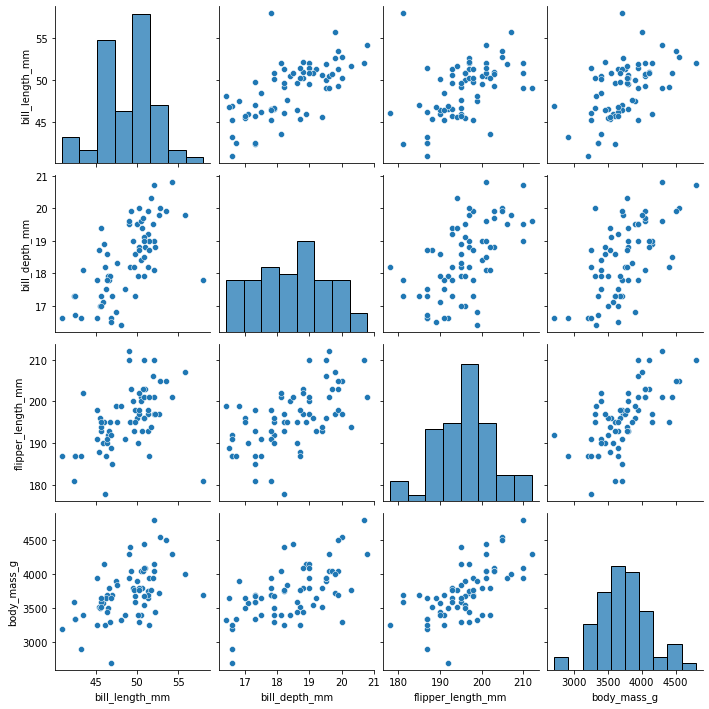

In [3]:
# Create pairwise scatterplots of data set
sns.pairplot(chinstrap_penguins)

**Setup for model construction**

Now that the data is clean, you are able to plot the data and construct a linear regression model. First, extract the one X variable, `bill_depth_mm`, and the one Y variable, `flipper_length_mm`, that you are targeting.

In [4]:
# Subset Data
ols_data = chinstrap_penguins[["bill_depth_mm", "flipper_length_mm"]]

Because this example is using statsmodels, save the ordinary least squares formula as a string so the computer can understand how to run the regression. The Y variable, `flipper_length_mm` comes first, followed by a tilde and the name for the X variable, `bill_depth_mm`.

In [5]:
# Write out formula
ols_formula = "flipper_length_mm ~ bill_depth_mm"

**Construct the model**

In order to construct the model, you’ll first need to import the `ols` function from the `statsmodels.formula.api` interface.

In [6]:
# Import ols function
from statsmodels.formula.api import ols

Next, plug in the formula and the saved data into the `ols` function. Then, use the `fit` method to fit the model to the data. Lastly, use the `summary` method to get the results from the regression model. 

In [7]:
# Build OLS, fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      flipper_length_mm   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     33.48
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           2.16e-07
Time:                        14:57:38   Log-Likelihood:                -215.62
No. Observations:                  68   AIC:                             435.2
Df Residuals:                      66   BIC:                             439.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       128.6967     11.623     11.073      0.000     105.492     151.902
bill_depth_mm     3.6441      0.630      5.786      0.000       2.387       4.902
==============================================================================
Omnibus:                        1.350   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.509   Jarque-Bera (JB):                0.837
Skew:                          -0.255   Prob(JB):                        0.658
Kurtosis:                       3.190   Cond. No.                         303.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

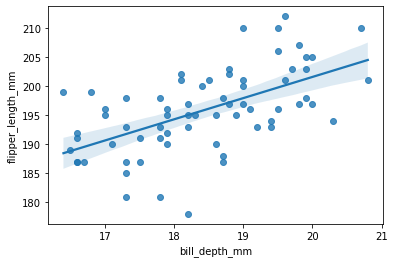

In [8]:
sns.regplot(x = "bill_depth_mm", y = "flipper_length_mm", data = ols_data)

**Model predictions and residuals**

You can access the predictions and residuals from a fitted 
[statsmodels.regression.linear_model.OLS](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html)
 or 
[statsmodels.regression.linear_model.OLSResults](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html)
 object as follows.

**Predictions**

Use the model’s 
[predict()](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.predict.html#statsmodels.regression.linear_model.OLS.predict)
 method, passing to it an array containing the values of the independent variable(s):

In [9]:
predictions = model.predict(chinstrap_penguins[["bill_depth_mm"]])

**Residuals**

Use the model’s `resid` attribute:

In [10]:
residuals = model.resid

### 2. Normality

The normality assumption **focuses on the errors**, which can be estimated by the residuals, or the difference between the observed values in the data and the values predicted by the regression model. For that reason, the normality assumption can only be confirmed **after** a model is built and predicted values are calculated. Once the model has been built, you can either create a QQ-plot to check that the residuals are normally distributed, or create a histogram of the residuals. Whether the assumption is met is up to some level of interpretation.

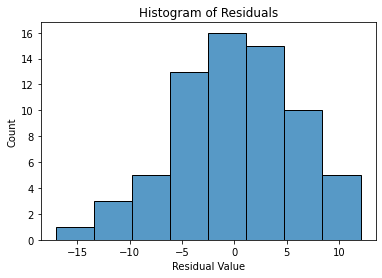

In [11]:
import matplotlib.pyplot as plt
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

**Quantile-quantile plot**

The **quantile-quantile plot (Q-Q plot)** is a graphical tool used to compare two probability distributions by plotting their quantiles against each other. Data professionals often prefer Q-Q plots to histograms to gauge the normality of a distribution because it’s easier to discern whether a plot adheres to a straight line than it is to determine how closely a histogram follows a normal curve. Here’s how Q-Q plots work when assessing the normality of a model’s residuals:

1. **Rank-order the residuals**. Sort your n residuals from least to greatest. For each one, calculate what percentage of the data falls at or below this rank. These are the n quantiles of your data.

2. **Compare to a normal distribution**. Divide a standard normal distribution into n+1 equal areas (i.e., slice it n times). If the residuals are normally distributed, the quantile of each residual (i.e., what percentage of the data falls below each ranked residual) will align closely with the corresponding z-scores of each of the n cuts on the standard normal distribution (these can be found in a normal z-score table or, more commonly, using statistical software). 

3. **Construct a plot**. A Q-Q plot has the known quantile values of a standard normal distribution along its x-axis and the rank-ordered residual values on its y-axis. If the residuals are normally distributed, the quantile values of the residuals will correspond with those of the standardized normal distribution, and both will increase linearly. If you first standardize your residuals (convert to z-scores by subtracting the mean and dividing by the standard deviation), the two axes will be on identical scales, and, if the residuals are indeed normally distributed, the line will be at a 45° angle. However, standardizing the residuals is not a requirement of a Q-Q plot. In either case, if the resulting plot is not linear, the residuals are not normally distributed.

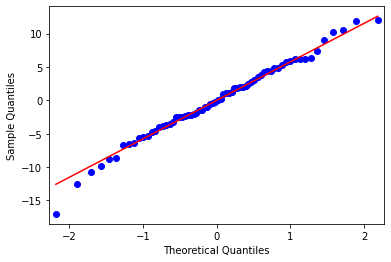

In [12]:
import matplotlib.pyplot as plt

fig = sm.qqplot(residuals, line = 's')
plt.show()

### 3. Independent Observations

Whether or not observations are independent is dependent on understanding your data. Asking questions like:

- How was the data collected?
- What does each data point represent?
- Based on the data collection process, is it likely that the value of one data point impacts the value of another data point?

An objective review of these questions, which would include soliciting insights from others who might notice things you don't, can help you determine whether or not the independent observations assumption is violated. This in turn will allow you to determine your next steps in working with the dataset at hand.

### 4. Homoscedasticity

Like the normality assumption, the homoscedasticity assumption concerns the residuals of a model, so it can only be evaluated after a regression model has already been constructed. A scatterplot of the fitted values (i.e., the model’s predicted Y values) versus the residuals can help determine whether the homoscedasticity assumption is violated.

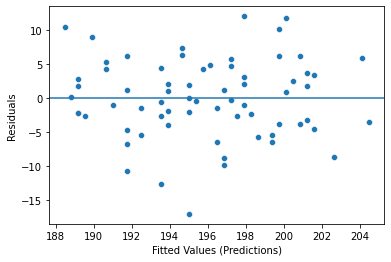

In [13]:
# Import matplotlib
import matplotlib.pyplot as plt
fig = sns.scatterplot(x=predictions, y=residuals)

# Add reference line at residuals = 0
fig.axhline(0)

# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values (Predictions)")
fig.set_ylabel("Residuals")

# Show the plot
plt.show()

### What to do if an assumption is violated

Now that you've reviewed the four assumptions and how to test for their violations, it’s time to discuss some common next steps you can take once an assumption is violated. Keep in mind that if you transform the data, this might change how you interpret the results. Additionally, if these potential solutions don’t work for your data, you have to consider trying a different kind of model.

For now, focus on a few essential approaches to get you started!

**Linearity**

- Transform one or both of the variables, such as taking the logarithm.
    - For example, if you are measuring the relationship between years of education and income, you can take the logarithm of the income variable and check if that helps the linear relationship.

**Normality**

- Transform one or both variables. Most commonly, this would involve taking the logarithm of the outcome variable.
    - When the outcome variable is right skewed, such as income, the normality of the residuals can be affected. So, taking the logarithm of the outcome variable can sometimes help with this assumption.
    - If you transform a variable, you will need to reconstruct the model and then recheck the normality assumption to be sure. If the assumption is still not satisfied, you’ll have to continue troubleshooting the issue. 

<img src="images/right_skewed.png">

**Independent observations**

- Take just a subset of the available data.
    - If, for example, you are conducting a survey and get responses from people in the same household, their responses may be correlated. You can correct for this by just keeping the data of one person in each household.
    - Another example is if you are collecting data over a time period. Let’s say you are researching data on bike rentals. If you collect your data every 15 minutes, the number of bikes rented out at 8:00 a.m. might correlate with the number of bikes rented out at 8:15 a.m. But, perhaps the number of bikes rented out is independent if the data is taken once every 2 hours, instead of once every 15 minutes.

**Homoscedasticity**

- Define a different outcome variable.
    - If you are interested in understanding how a city’s population correlates with the number of restaurants in a city, you know that some cities are much more populous than others. You can then redefine the outcome variable as the ratio of population to restaurants.

- Transform the Y variable.
    - As with the above assumptions, sometimes taking the logarithm or transforming the Y variable in another way can potentially fix inconsistencies with the homoscedasticity assumption.

**Key takeaways**

- There are four key assumptions for simple linear regression: linearity, normality, independent observations, and homoscedasticity.

- There are different ways to check the validity of each assumption. Some assumptions can be checked before the model is built, while some can be checked after the model is built.

- There are ways to work with the data that can correct for violations of model assumptions.

- Changing the variables will change the interpretation.

- If the assumptions are violated, even after data transformations, you should consider other models for your data.